50000 sales Analysis and Visualization

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import plotly.express as px

In [4]:
df = pd.read_excel(r"C:\Users\OLIVE\Downloads\50000 Sales Records.xlsx")

#copying a new dataframe to retain the original data
df_new = df.copy()

#basic pandas analytics
print(df_new.shape)
print(df_new.describe())
print(df_new.isnull().sum())
print(df_new.duplicated().sum())
print(df_new.memory_usage(deep = True))

(50000, 14)
                       Order Date      Order ID                   Ship Date  \
count                       50000  5.000000e+04                       50000   
mean   2013-10-11 06:32:29.184000  5.497330e+08  2013-11-05 06:39:15.264000   
min           2010-01-01 00:00:00  1.000132e+08         2010-01-02 00:00:00   
25%           2011-11-15 00:00:00  3.240070e+08         2011-12-11 00:00:00   
50%           2013-10-09 00:00:00  5.504224e+08         2013-11-02 00:00:00   
75%           2015-09-04 00:00:00  7.767824e+08         2015-09-30 00:00:00   
max           2017-07-28 00:00:00  9.999995e+08         2017-09-16 00:00:00   
std                           NaN  2.609179e+08                         NaN   

        Units Sold    Unit Price     Unit Cost  Total Revenue    Total Cost  \
count  50000.00000  50000.000000  50000.000000   5.000000e+04  5.000000e+04   
mean    4999.61898    265.651350    187.322482   1.323716e+06  9.331574e+05   
min        1.00000      9.330000      6

In [6]:
#converting all object dtypes to category for faster analysis
for col in df_new.select_dtypes(include="object").columns:
    df_new[col] = df_new[col].astype("category")

print(df_new.dtypes)
print(df_new.memory_usage(deep=True))

Region                  category
Country                 category
Item Type               category
Sales Channel           category
Order Priority          category
Order Date        datetime64[ns]
Order ID                   int64
Ship Date         datetime64[ns]
Units Sold                 int64
Unit Price               float64
Unit Cost                float64
Total Revenue            float64
Total Cost               float64
Total Profit             float64
dtype: object
Index                132
Region             50766
Country           114880
Item Type          50991
Sales Channel      50219
Order Priority     50372
Order Date        400000
Order ID          400000
Ship Date         400000
Units Sold        400000
Unit Price        400000
Unit Cost         400000
Total Revenue     400000
Total Cost        400000
Total Profit      400000
dtype: int64


In [7]:
#dropping some columns
df_new = df_new.drop(columns=["Country","Order ID","Ship Date","Unit Price","Unit Cost","Total Cost"])
print(df_new)

                                  Region        Item Type Sales Channel  \
0                     Sub-Saharan Africa        Household       Offline   
1                                 Europe        Baby Food        Online   
2                                 Europe             Meat        Online   
3                                 Europe             Meat        Online   
4                                 Europe           Cereal        Online   
...                                  ...              ...           ...   
49995  Central America and the Caribbean        Baby Food       Offline   
49996  Central America and the Caribbean  Office Supplies        Online   
49997                               Asia    Personal Care       Offline   
49998                 Sub-Saharan Africa          Clothes        Online   
49999                 Sub-Saharan Africa       Vegetables       Offline   

      Order Priority Order Date  Units Sold  Total Revenue  Total Profit  
0                  M 201

In [8]:
#adding ne columns for year,month,week,day to help in consumer behavior
df_new["Year"] = df_new["Order Date"].dt.year
df_new["Month"] = df_new["Order Date"].dt.month_name()
df_new["Week"] = df_new["Order Date"].dt.day_of_week
df_new["Day"] = df_new["Order Date"].dt.day_name()

print(df_new)

                                  Region        Item Type Sales Channel  \
0                     Sub-Saharan Africa        Household       Offline   
1                                 Europe        Baby Food        Online   
2                                 Europe             Meat        Online   
3                                 Europe             Meat        Online   
4                                 Europe           Cereal        Online   
...                                  ...              ...           ...   
49995  Central America and the Caribbean        Baby Food       Offline   
49996  Central America and the Caribbean  Office Supplies        Online   
49997                               Asia    Personal Care       Offline   
49998                 Sub-Saharan Africa          Clothes        Online   
49999                 Sub-Saharan Africa       Vegetables       Offline   

      Order Priority Order Date  Units Sold  Total Revenue  Total Profit  \
0                  M 20

C:\Users\OLIVE\AppData\Local\Temp\ipykernel_6392\1516340927.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_yearly_profits = df_new.pivot_table(


Year                                    2010       2011       2012       2013  \
Region                                                                          
Asia                               382620765  374454550  368719445  391621080   
Australia and Oceania              200513938  201203993  227491070  226505385   
Central America and the Caribbean  262000258  297883346  254650306  279086219   
Europe                             665042758  660706768  648855176  663019055   
Middle East and North Africa       306803148  320514066  315940324  306756305   
North America                       65688024   55837032   50199068   53388018   
Sub-Saharan Africa                 653796872  712015401  692319802  644815356   

Year                                    2014       2015       2016       2017  
Region                                                                         
Asia                               367126316  388010629  396936078  216617636  
Australia and Oceania         

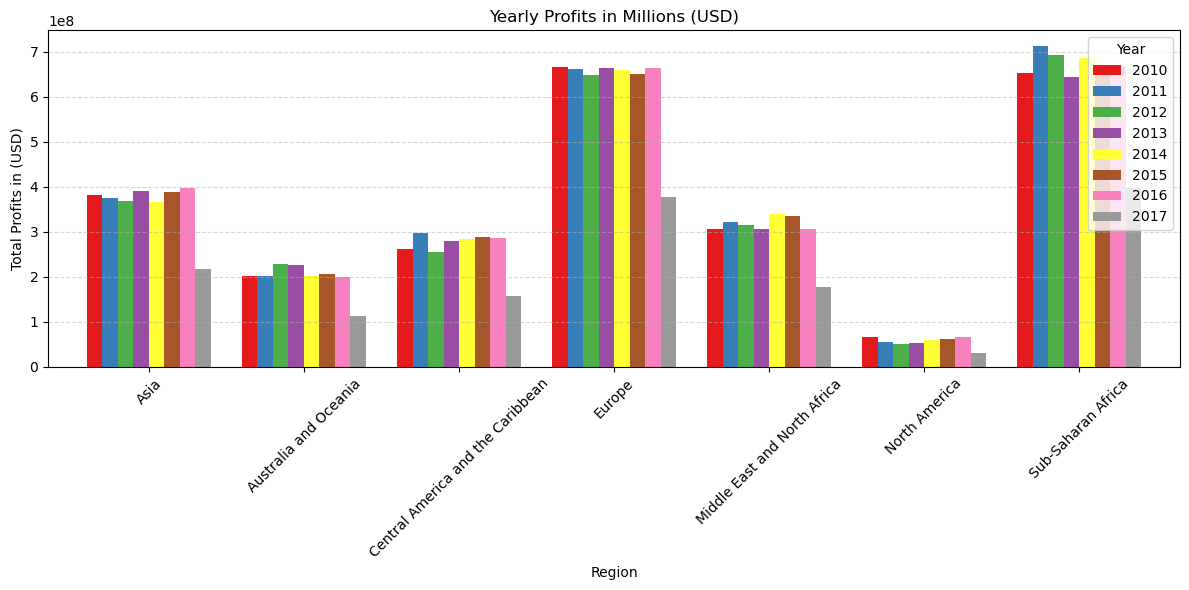

In [14]:
df_yearly_profits = df_new.pivot_table(
    index="Region",
    columns="Year",
    values="Total Profit",
    aggfunc="sum"
).astype(int)
print(df_yearly_profits)

df_yearly_profits.plot(kind="bar",figsize=(12,6),colormap="Set1",width = 0.8)
plt.title("Yearly Profits in Millions (USD)")
plt.xlabel("Region")
plt.xticks(rotation = 45)
plt.ylabel("Total Profits in (USD)")
plt.legend(title = "Year")
plt.tight_layout()
plt.grid(axis="y",linestyle = "--",alpha = 0.5)
plt.show()

C:\Users\OLIVE\AppData\Local\Temp\ipykernel_6392\665182924.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_monthly_profits = df_new.pivot_table(


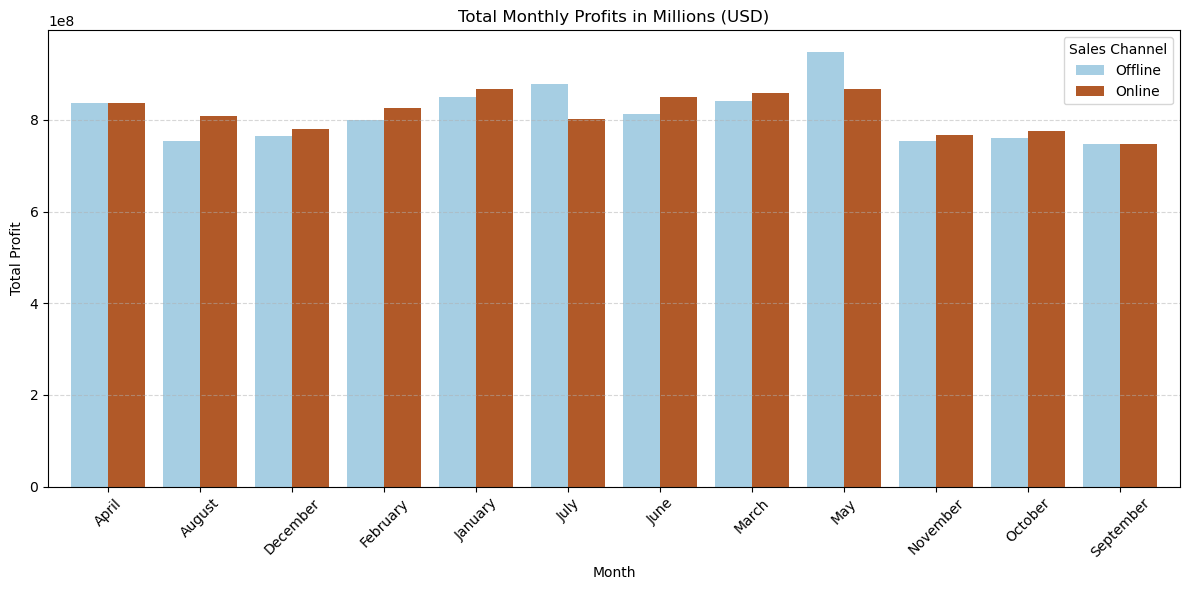

In [18]:
df_monthly_profits = df_new.pivot_table(
    index="Month",
    columns="Sales Channel",
    values="Total Profit",
    aggfunc="sum",

).astype(int)

df_monthly_profits.plot(kind="bar",figsize=(12,6),colormap="Paired",width = 0.8)
plt.title("Total Monthly Profits in Millions (USD)")
plt.xlabel("Month")
plt.xticks(rotation = 45)
plt.ylabel("Total Profit")
plt.legend(title = "Sales Channel")
plt.tight_layout()
plt.grid(axis="y",linestyle = "--",alpha = 0.5)
plt.show()

C:\Users\OLIVE\AppData\Local\Temp\ipykernel_6392\2495871758.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_daily_profits = df_new.pivot_table(


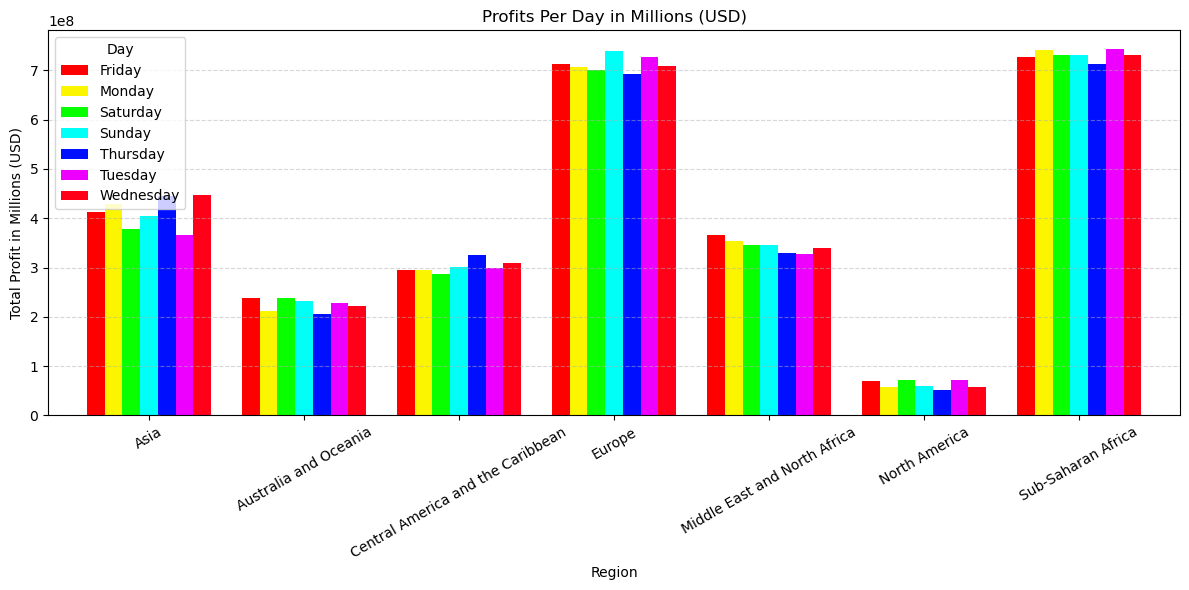

In [21]:
df_daily_profits = df_new.pivot_table(
    index="Region",
    columns="Day",
    values="Total Profit",
    aggfunc="sum"
).astype(int)

df_daily_profits.plot(kind="bar",figsize=(12,6),colormap="hsv",width = 0.8)
plt.title("Profits Per Day in Millions (USD)")
plt.xlabel("Region")
plt.xticks(rotation = 30)
plt.ylabel("Total Profit in Millions (USD)")
plt.tight_layout()
plt.legend(title = "Day")
plt.grid(axis="y",linestyle = "--",alpha = 0.5)
plt.show()

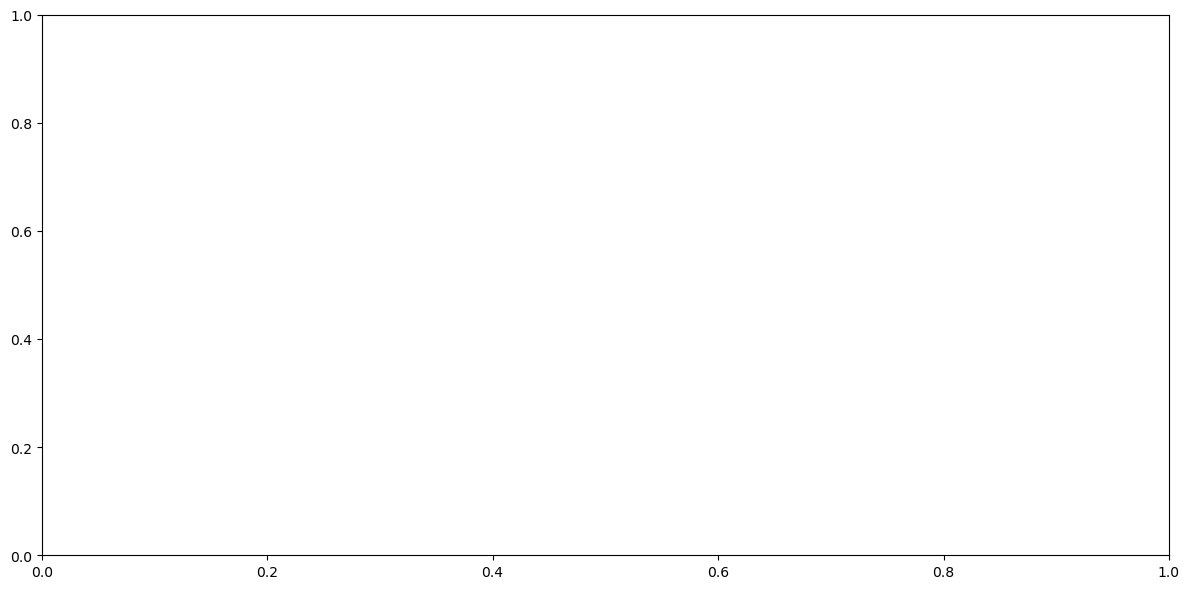

In [22]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots(figsize=(12, 6))

years = sorted(df_new['Year'].unique())
regions = df_new['Region'].unique()
colors = plt.cm.Set1(np.linspace(0, 1, len(regions)))

def animate(year):
    ax.clear()
    data = df_new[df_new["Year"] == year].groupby("Region")["Total Profit"].sum().sort_values()
    ax.bar(data.index, data.values, color=colors)
    ax.set_title(f"Total Profits by Region - {year}", fontsize=16)
    ax.set_ylabel("Total Profit (USD)")
    ax.set_xlabel("Region")
    ax.grid(axis="y", linestyle="--", alpha=0.5)
    ax.set_ylim(0, df_new["Total Profit"].max() * 1.1)

ani = animation.FuncAnimation(fig, animate, frames=years, repeat=True, interval=2000)
plt.tight_layout()
plt.show()


In [23]:
fig = px.bar(
    df_new,
    x="Region",
    y="Total Profit",
    color="Region",
    animation_frame="Year",
    title="Animated Total Profits by Region Over Years",
    labels={"Total Profit": "Total Profit (USD)"}
)
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()
